# Data Preprocessing

## StandardScaler and MinMaxScaler

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df2 = df[['survived', 'pclass', 'age', 'parch']]
df2.head(2)

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0


In [8]:
df3 = df2.fillna(df2.mean())

In [9]:
df3.isnull().sum().sum()

0

In [15]:
x = df3.drop(columns = 'survived', axis = 1)
y = df3.iloc[:, 0]

In [16]:
print('Shpe of X: ', x.shape)
print('Shape of y: ', y.shape)

Shpe of X:  (891, 3)
Shape of y:  (891,)


In [24]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42 )

In [23]:
print('Shape of x_train', x_train.shape)
print('Shape of y_train', y_train.shape)
print('\n')
print('Shape of x_test', x_test.shape)
print('Shape of y_test', y_test.shape)

Shape of x_train (623, 3)
Shape of y_train (623,)


Shape of x_test (268, 3)
Shape of y_test (268,)


## StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
sc.fit(x_train)

StandardScaler()

In [28]:
sc.mean_

array([ 2.34189406, 29.34447927,  0.38683788])

In [29]:
sc.scale_

array([ 0.81928654, 13.01755249,  0.8070437 ])

In [30]:
x_train.describe()

,pclass,age,parch
count,623.000000,623.000000,623.000000
mean,2.341894,29.344479,0.386838
std,0.819945,13.028013,0.807692
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,80.000000,6.000000


In [40]:
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [41]:
x_train_sc

array([[-1.63788124, -1.94694658,  1.99885349],
       [ 0.80326712,  0.02724309, -0.47932706],
       [ 0.80326712, -2.17740465,  0.75976322],
       ...,
       [ 0.80326712,  0.8953696 , -0.47932706],
       [-1.63788124, -1.17875302,  1.99885349],
       [-1.63788124, -0.64101752,  0.75976322]])

In [42]:
x_train_sc = pd.DataFrame(x_train_sc, columns = ['pclass', 'age', 'parch'])
x_test_sc = pd.DataFrame(x_test_sc, columns = ['pclass', 'age', 'parch'])

In [43]:
x_train_sc.head()

,pclass,age,parch
0,-1.637881,-1.946947,1.998853
1,0.803267,0.027243,-0.479327
2,0.803267,-2.177405,0.759763
3,-0.417307,0.511273,1.998853
4,-0.417307,1.049008,0.759763


In [46]:
x_train_sc.describe().round(2)   # need to round off here

,pclass,age,parch
count,623.00,623.00,623.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.64,-2.22,-0.48
25%,-0.42,-0.56,-0.48
50%,0.80,0.03,-0.48
75%,0.80,0.43,-0.48
max,0.80,3.89,6.96


## MinMaxScaler

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
mms = MinMaxScaler()

In [51]:
mms.fit(x_train)

MinMaxScaler()

In [52]:
x_train_mms = mms.transform(x_train)
x_test_mms = mms.transform(x_test)

In [53]:
x_train_mms = pd.DataFrame(x_train_mms, columns = ['pclass', 'age', 'parch'])
x_test_mms = pd.DataFrame(x_test_mms, columns = ['pclass', 'age', 'parch'])

In [55]:
x_train_mms.sample(2)

,pclass,age,parch
31,1.0,0.271174,0.0
220,0.5,0.421965,0.0


In [56]:
x_train_mms.describe().round(2)

,pclass,age,parch
count,623.00,623.00,623.00
mean,0.67,0.36,0.06
std,0.41,0.16,0.13
min,0.00,0.00,0.00
25%,0.50,0.27,0.00
50%,1.00,0.37,0.00
75%,1.00,0.43,0.00
max,1.00,1.00,1.00


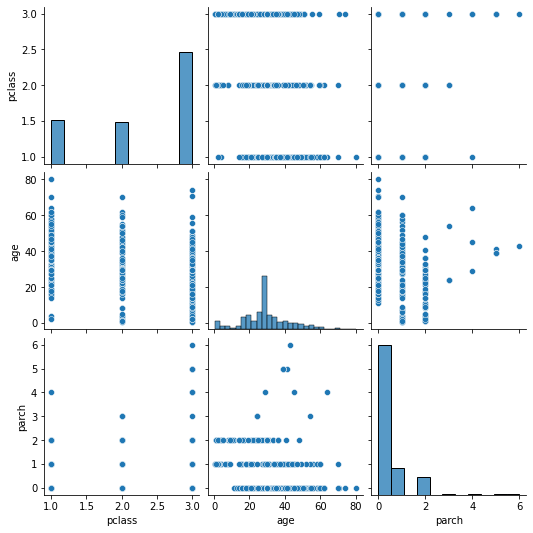

In [57]:
sns.pairplot(x_train)

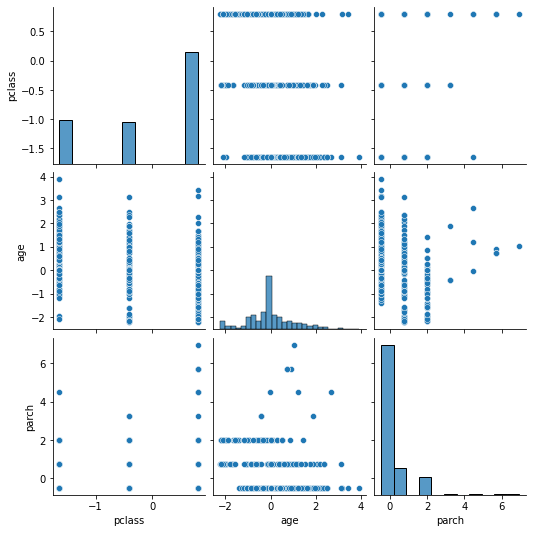

In [59]:
sns.pairplot(x_train_sc)

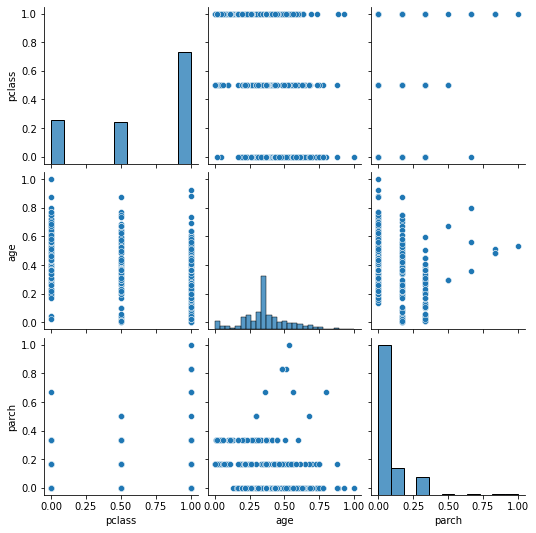

In [60]:
sns.pairplot(x_train_mms)